In [1]:
import numpy as np
from keras.layers import Embedding
from keras.layers import SimpleRNN
from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.datasets import imdb
from keras.layers import LSTM
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Using TensorFlow backend.


In [2]:
max_features = 10000
maxlen = 500
batch_size = 32

In [3]:
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (sample x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (sample x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [4]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
%load_ext memory_profiler

In [8]:
%%memit
#%%time
history = model.fit(input_train,
                   y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 95s 5ms/step - loss: 0.4943 - acc: 0.7702 - val_loss: 0.4266 - val_acc: 0.8094
Epoch 2/10
20000/20000 [==============================] - 97s 5ms/step - loss: 0.2936 - acc: 0.8835 - val_loss: 0.3262 - val_acc: 0.8612
Epoch 3/10
20000/20000 [==============================] - 98s 5ms/step - loss: 0.2357 - acc: 0.9095 - val_loss: 0.2917 - val_acc: 0.8756
Epoch 4/10
20000/20000 [==============================] - 101s 5ms/step - loss: 0.2012 - acc: 0.9248 - val_loss: 0.2873 - val_acc: 0.8794
Epoch 5/10
20000/20000 [==============================] - 98s 5ms/step - loss: 0.1752 - acc: 0.9376 - val_loss: 0.3245 - val_acc: 0.8894
Epoch 6/10
20000/20000 [==============================] - 97s 5ms/step - loss: 0.1635 - acc: 0.9425 - val_loss: 0.3139 - val_acc: 0.8642
Epoch 7/10
20000/20000 [==============================] - 100s 5ms/step - loss: 

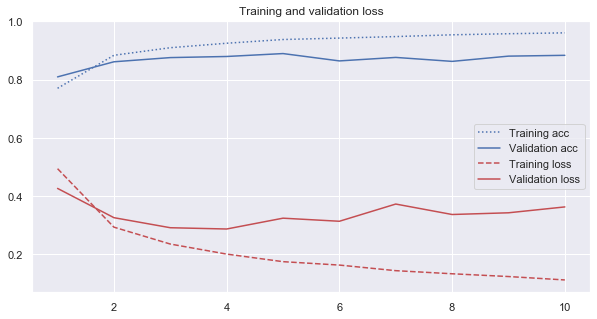

In [9]:
epoches = range(1, len(history.history['acc']) + 1)

plt.figure(figsize=(10,5))

plt.plot(epoches, history.history['acc'], 'b:', label='Training acc')
plt.plot(epoches, history.history['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epoches, history.history['loss'], 'r--', label='Training loss')
plt.plot(epoches, history.history['val_loss'], 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend();